## Описание проекта

**Проект:** "Линейные модели в машинном обучении"<br>
<br>
**Заказчик** — владелец молочного хозяйства «Вольный луг».<br>
**Цель проекта** - разработка прогнозных моделей отбора бурёнок для покупки:
* Прогноз удоев
* Вероятность получения вкусного молока<br>
<br>

**Описание данных:**
<br>
* Источники:
    * Данные о стаде фермера на текущий момент. 
    * Имена папы каждой коровы в стаде фермера.
    * Информация о коровах ассоциацией пастбищ «ЭкоФерма» (коровы на продажу).
 <br>
 
**Характеристики и показатели :**
<br>
* **ferma_main.csv** - Стадо фермера<br>

    * **id** — уникальный идентификатор коровы.
    * **Удой, кг** — масса молока, которую корова даёт в год (в килограммах).
    * **ЭКЕ (Энергетическая кормовая единица)** — показатель питательности корма коровы.
    * **Сырой протеин, г** — содержание сырого протеина в корме (в граммах).
    * **СПО (Сахаро-протеиновое соотношение)** — отношение сахара к протеину в корме коровы.
    * **Порода** — порода коровы.
    * **Тип пастбища** — ландшафт лугов, на которых паслась корова.
    * **порода папы_быка** — порода папы коровы.
    * **Жирность,%** — содержание жиров в молоке (в процентах).
    * **Белок,%** — содержание белков в молоке (в процентах).
    * **Вкус молока** — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
    * **Возраст** — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).<br>
    
* Признаки в датасете **ferma_main.csv** можно разделить на группы:<br>
    * Характеристики коровы - **id**, **Порода**, **порода папы_быка**, **Возраст**
    * Характеристики корма - **ЭКЕ (Энергетическая кормовая единица)**, **Сырой протеин, г**, **СПО (Сахаро-протеиновое соотношение)**
    * Характеристика пастбища - **Тип пастбища**
    * Характеристики молока - **Удой, кг**, **Жирность,%**,  **Белок,%**,  **Вкус молока**<br>
<br>
* **cow_buy.csv** - Данные о коровах ЭкоФермы, рассматриваемых для покупки фермером.<br>
    * **Порода** — ландшафт лугов, на которых паслась корова.
    * **Тип пастбища** — порода папы коровы.
    * **порода папы_быка** — содержание жиров в молоке (в процентах).
    * **Имя_папы** — содержание белков в молоке (в процентах).
    * **Текущая_жирность,%** — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
    * **Текущий_уровень_белок,%** — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).
    * **Возраст** — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).<br>
<br>
* **ferma_dad.csv** - хранит имя папы каждой коровы в стаде фермера. <br>
    * **id** — ландшафт лугов, на которых паслась корова.
    * **Имя Папы** — порода папы коровы.<br>
<br>

**Этапы реализации проекта:**
* Загрузка данных
* Предобработка данных
* Исследовательский анализ данных
* Кореляционный анализ
* Обучение моделией линейной регрессии
* Обучение моделией логистической регрессии

## Реализация проекта

### Импорт библиотек и глобальные установки

In [2]:
#import sklearn
#!pip install -U scikit-learn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy import stats    
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (OneHotEncoder, StandardScaler)
from sklearn.linear_model import (LinearRegression, LogisticRegression)
from sklearn.metrics import (
                             mean_absolute_error,
                             mean_squared_error,
                             confusion_matrix,
                             precision_score,
                             accuracy_score,
                             recall_score,
                             r2_score
                            )

import warnings 

warnings.filterwarnings("ignore", category=UserWarning)
pd.set_option("display.max_columns", None) # Отображать все поля DF

bold_start = '\033[1m'
bold_end   = '\033[0m'

RANDOM_STATE = 42

In [4]:
#import sklearn
#sklearn.__version__

### Функции

#### df_inf - Информация о DataFrame

In [5]:
def df_inf(df, head_row=5, drop_duplicates_flag=False):
    try:
        df_name = df.name
        print(bold_start,'Имя:', df_name, bold_end)
    except:
        display(bold_start,'Имя: Не определено', bold_end)
    print('')
    
    print(bold_start,'Информация: ', bold_end)
    df.info()
    print('')

    print(bold_start,'Описание полей: ', bold_end)
    display(df.describe())
    print('')

    print(bold_start,'Пропуски: ', bold_end)
    display(df.isna().sum().T)
    print('')
    
    df_duplicates = []
    df_duplicates = df[df.duplicated()]

    if len(df_duplicates) > 0:
        print(bold_start,'Количество дубликатов:',len(df_duplicates), bold_end)
        print(bold_start,'Дубликаты (первые', head_row, 'строк)', bold_end)
        display(df_duplicates.head(head_row))
        if drop_duplicates_flag:
            print(bold_start,'Дубликаты удалены!', bold_end)
            df.drop_duplicates(keep = 'first', inplace = True)
            print(bold_start,'Количество дубликатов после удаления:',len(df_duplicates), bold_end)
    else:
        print(bold_start,'Дубликаты не обнаружены!', bold_end)

    print('')
    print(bold_start, df_name, '(первые', head_row, 'строк)', bold_end)
    display(df.head(head_row))

    return df_duplicates

#### residuals_predictions_visualization - Визуализация парамметров модели

In [6]:
def residuals_predictions_visualization(X_train_, residuals_, predictions_):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    
    X_train_.plot(kind='hist', bins=10, ax=axes[0], alpha=0.4)
    axes[0].set_title('Гистограмма распределения')
    X_train_.plot(kind='box', ax=axes[1])
    axes[1].set_title('Разброс значений признаков')
    plt.show()

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    axes[0].hist(residuals_, bins = 50)
    axes[0].set_title('Распределение остатков')
    axes[0].set_xlabel('Остатки')
    
    axes[1].scatter(predictions_, residuals_)
    axes[1].set_xlabel('Предсказания')
    axes[1].set_ylabel('Остатки')
    axes[1].set_title('Дисперсия')
    plt.show()
    print(f'Остатки медиана = {residuals_.median():0.2f} ')
    print(f'Остатки среднее = {residuals_.mean():0.2f} ')
    print()

#### model_training - Создание и обучение модели, расчет и вывод метрик

In [7]:
def model_training(X_, y_, cat_columns_, num_columns_):

    # Разделение выборки на обучающую и целевую
    X_train, X_test, y_train, y_test = train_test_split(
        X_,
        y_,
        random_state=RANDOM_STATE)
    
    # Кодирование признаков
    try:
        encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
    except:
        encoder = OneHotEncoder(drop='first', sparse=False)
    
    X_train_ohe = encoder.fit_transform(X_train[cat_columns_])
    X_test_ohe = encoder.transform(X_test[cat_columns_])
    
    
    try:
        encoder_columns = encoder.get_feature_names_out()
    except:
        encoder_columns = encoder.get_feature_names()
        
    # Масштабирование признаков
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[num_columns_])
    X_test_scaled = scaler.transform(X_test[num_columns_])
    
    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_columns)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_columns)
    
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_columns)
    
    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
    
    # обучение модели
    model_lr  = LinearRegression()
    model_lr.fit(X_train, y_train)
    
    # прогноз
    predictions = model_lr.predict(X_test)
    
    # Остатки
    residuals = y_test - predictions
    
    # Визуализация
    residuals_predictions_visualization(X_train[num_columns_], residuals, predictions)
    
    # рассчитаем значения R²
    r2 = r2_score(y_test, predictions)
    print(f'R² = {r2:.2f}  [−∞, 1]')
    
    # MSE
    mse = mean_squared_error(y_test, predictions)
    print(f'MSE = {mse:0.2f}, [0, +∞]')

    # RMSE
    rmse = mean_squared_error(y_test, predictions, squared=False)
    print(f'RMSE = {rmse:0.2f}, [0, +∞]')
    
    # MAE
    mae = mean_absolute_error(y_test, predictions)
    print(f'MAE = {mae:0.2f} [0, +∞]')
    
    return predictions, encoder, encoder_columns, scaler, model_lr
    

#### column_analiser - Визуализация парамметров поля, диаграмммы размаха и распрелделения

In [64]:
def column_analiser(df_, column_, x_label=[], y_label=[], print_unique=False):

    print(bold_start, f'Поле : {column_} - {x_label[0]}', bold_end)
    print('')
    
    print(df_[column_].describe())
    if print_unique:
        print('Список значений')
        print(df_[column_].unique())
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
    df_[column_].plot(kind='box', ax=axes[0])
    axes[0].set_ylabel(y_label)

    
    axes[1] = plt.hist(
        df_[column_],
        bins=70,
    )
    axes[0].set_xlabel(x_label[0])
    axes[0].set_ylabel(y_label[0])
    
    #axes[1].set_xlabel(x_label[1])
    #axes[1].set_ylabel(y_label[1])
    
    plt.xlabel(x_label[1])
    plt.ylabel(y_label[1])
    #plt.title('Распределение')    

    plt.show()

#### categorical_property_visualization

In [9]:
def categorical_property_visualization(data_, indexes_=[], titles_=[], values_='', aggfunc_='count'):
    columns = data_.columns
    
    row_ind = 0
    col_ind = 0
    subplot_ind = 0
    
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 7))
    
    for ind in indexes_:
        data_.pivot_table(
                                  index=ind,
                                  values=values_,
                                  aggfunc=aggfunc_
                                 ).plot(
            kind='pie',
            ax=axes[row_ind, col_ind],
            y='id',
            autopct='%1.0f%%'
                                       )
        axes[row_ind, col_ind].set_title(titles[subplot_ind])
        axes[row_ind, col_ind].get_legend().remove()
    
        subplot_ind += 1
        col_ind += 1
        if col_ind == 3:
            col_ind = 0
            row_ind += 1


## Загрузка данных

In [10]:
cow_buy_df = pd.read_csv('/datasets/cow_buy.csv', sep=';')
cow_buy_df.name='cow_buy_df'

ferma_dad_df = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
ferma_dad_df.name='ferma_dad_df'

ferma_main_df = pd.read_csv('/datasets/ferma_main.csv', sep=';')
ferma_main_df.name='ferma_main_df'

##  Предобработка данных

#### cow_buy_df - данные о коровах ЭкоФермы

In [11]:
df_inf(cow_buy_df, head_row=5, drop_duplicates_flag=False)

cow_buy_df.columns = [
    'breed',         # Порода
    'pasture_type',  # Тип пастбища
    'dad_breed',     # Порода папы_быка
    'dad_name',      # Имя_папы
    'fatness',       # Текущая_жирность%
    'protein',       # Текущий_уровень_белок%
    'age'            # Возраст
                     ]

 Имя: cow_buy_df 

 Информация:  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB

 Описание полей:  


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
count,20,20,20,20,20,20,20
unique,2,2,2,4,12,12,2
top,РефлешнСоверинг,равнинное,Соверин,Буйный,"3,73","3,074",более_2_лет
freq,11,11,12,8,3,5,15



 Пропуски:  


Порода                     0
Тип пастбища               0
порода папы_быка           0
Имя_папы                   0
Текущая_жирность,%         0
Текущий_уровень_белок,%    0
Возраст                    0
dtype: int64


 Количество дубликатов: 4 
 Дубликаты (первые 5 строк) 


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
14,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет



 cow_buy_df (первые 5 строк) 


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


In [12]:
cow_buy_df['fatness'] = cow_buy_df['fatness'].str.replace(',', '.')
cow_buy_df['fatness'] = cow_buy_df['fatness'].astype(float)

cow_buy_df['protein'] = cow_buy_df['protein'].str.replace(',', '.')
cow_buy_df['protein'] = cow_buy_df['protein'].astype(float)

#### ferma_dad_df - имя папы каждой коровы в стаде фермера

In [13]:
df_inf(ferma_dad_df, head_row=5, drop_duplicates_flag=True)

ferma_dad_df.columns = [
    'id',      # id
    'dad_name' # Имя Папы
]

 Имя: ferma_dad_df 

 Информация:  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB

 Описание полей:  


,id
count,629.00000
mean,315.00000
std,181.72094
min,1.00000
25%,158.00000
50%,315.00000
75%,472.00000
max,629.00000



 Пропуски:  


id          0
Имя Папы    0
dtype: int64


 Дубликаты не обнаружены! 

 ferma_dad_df (первые 5 строк) 


,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


#### ferma_main_df - данные о стаде фермера на текущий момент

In [14]:
df_inf(ferma_main_df, head_row=5, drop_duplicates_flag=True)

ferma_main_df.columns = [
    'id',                  # id
    'milk_yield',          # Удой, кг
    'energy_feed_unit',    # ЭКЕ (Энергетическая кормовая единица)
    'raw_protein',         # Сырой протеин, г
    'sugar_protein_ratio', # СПО (Сахаро-протеиновое соотношение)
    'breed',               # Порода
    'pasture_type',        # Тип пастбища
    'dad_breed',           # порода папы_быка
    'fatness',             # Жирность,%
    'protein',             # Белок,%
    'milk_taste',          # Вкус молока
    'age'                  # Возраст
                        ]

 Имя: ferma_main_df 

 Информация:  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-nu

,id,"Удой, кг","Сырой протеин, г"
count,634.000000,634.000000,634.000000
mean,317.460568,6187.025237,1922.682965
std,183.096982,1638.401021,182.392548
min,1.000000,5204.000000,1660.000000
25%,159.250000,5751.750000,1772.250000
50%,317.500000,6130.500000,1880.500000
75%,475.750000,6501.000000,2058.750000
max,629.000000,45616.000000,2349.000000



 Пропуски:  


id                                       0
Удой, кг                                 0
ЭКЕ (Энергетическая кормовая единица)    0
Сырой протеин, г                         0
СПО (Сахаро-протеиновое соотношение)     0
Порода                                   0
Тип пастбища                             0
порода папы_быка                         0
Жирность,%                               0
Белок,%                                  0
Вкус молока                              0
Возраст                                  0
dtype: int64


 Количество дубликатов: 5 
 Дубликаты (первые 5 строк) 


,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
629,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
630,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
631,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
632,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
633,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет


 Дубликаты удалены! 
 Количество дубликатов после удаления: 5 

 ferma_main_df (первые 5 строк) 


,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [15]:
ferma_main_df['energy_feed_unit'] = ferma_main_df['energy_feed_unit'].str.replace(',', '.')
ferma_main_df['energy_feed_unit'] = ferma_main_df['energy_feed_unit'].astype(float)

ferma_main_df['sugar_protein_ratio'] = ferma_main_df['sugar_protein_ratio'].str.replace(',','.')
ferma_main_df['sugar_protein_ratio'] = ferma_main_df['sugar_protein_ratio'].astype(float)

ferma_main_df['fatness'] = ferma_main_df['fatness'].str.replace(',', '.')
ferma_main_df['fatness'] = ferma_main_df['fatness'].astype(float)

ferma_main_df['protein'] = ferma_main_df['protein'].str.replace(',', '.')
ferma_main_df['protein'] = ferma_main_df['protein'].astype(float)

### Изучение категорийных полей

#### breed - порода

In [16]:
print('ferma_main_df.breed', ferma_main_df['breed'].unique())
print('cow_buy_df.breed', cow_buy_df['breed'].unique())

cow_buy_df['breed'] = cow_buy_df['breed'].str.replace('РефлешнСоверинг', 'Соверинг')
ferma_main_df['breed'] = ferma_main_df['breed'].str.replace('РефлешнСоверинг', 'Соверинг')

cow_buy_df['breed'] = cow_buy_df['breed'].str.replace('Вис Бик Айдиал', 'Айдиал')
ferma_main_df['breed'] = ferma_main_df['breed'].str.replace('Вис Бик Айдиал', 'Айдиал')

ferma_main_df.breed ['Вис Бик Айдиал' 'РефлешнСоверинг']
cow_buy_df.breed ['Вис Бик Айдиал' 'РефлешнСоверинг']


#### dad_breed - порода отца

In [17]:
print('ferma_main_df.dad_breed - ', ferma_main_df['dad_breed'].unique())
print('cow_buy_df.dad_breed    - ', cow_buy_df['dad_breed'].unique())

ferma_main_df['dad_breed'] = ferma_main_df['dad_breed'].str.replace('Айдиалл','Айдиал')
ferma_main_df['dad_breed'] = ferma_main_df['dad_breed'].str.replace('Соверин','Соверинг')
cow_buy_df['dad_breed'] = cow_buy_df['dad_breed'].str.replace('Соверин','Соверинг')

ferma_main_df.dad_breed -  ['Айдиал' 'Соверин' 'Айдиалл']
cow_buy_df.dad_breed    -  ['Айдиал' 'Соверин']


#### pasture_type - тип пастбища

In [18]:
print('ferma_main_df.pasture_type - ', ferma_main_df['pasture_type'].unique())
print('cow_buy_df.pasture_type    - ', cow_buy_df['pasture_type'].unique())

ferma_main_df['pasture_type'] = ferma_main_df['pasture_type'].str.replace('Равнинные','Равнинное')
cow_buy_df['pasture_type'] = cow_buy_df['pasture_type'].str.replace('равнинное','Равнинное')
cow_buy_df['pasture_type'] = cow_buy_df['pasture_type'].str.replace('холмистое','Холмистое')

ferma_main_df.pasture_type -  ['Равнинное' 'Равнинные' 'Холмистое']
cow_buy_df.pasture_type    -  ['холмистое' 'равнинное']


#### dad_name - имя отца

In [19]:
print('ferma_dad_df.dad_name  - ', ferma_dad_df['dad_name'].unique())
print('cow_buy_df.dad_name    - ', cow_buy_df['dad_name'].unique())

ferma_dad_df.dad_name  -  ['Буйный' 'Соловчик' 'Барин' 'Геркулес']
cow_buy_df.dad_name    -  ['Геркулес' 'Буйный' 'Барин' 'Соловчик']


#### age - возраст

In [20]:
print('ferma_main_df.age - ', ferma_main_df['age'].unique())
print('cow_buy_df.age    - ', cow_buy_df['age'].unique())

ferma_main_df.age -  ['более_2_лет' 'менее_2_лет']
cow_buy_df.age    -  ['более_2_лет' 'менее_2_лет']


### Объединение ferma_main_df и ferma_dad_df

In [21]:
print('Количество записей ferma_main_df -', len(ferma_main_df))
ferma_data_df = pd.merge(ferma_main_df, ferma_dad_df, how='left', on='id')
ferma_data_df.name = 'ferma_data'
print('Количество записей ferma_data_df -', len(ferma_data_df))
df_inf(ferma_data_df, head_row=5, drop_duplicates_flag=False)

Количество записей ferma_main_df - 629
Количество записей ferma_data_df - 629
 Имя: ferma_data 

 Информация:  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   629 non-null    int64  
 1   milk_yield           629 non-null    int64  
 2   energy_feed_unit     629 non-null    float64
 3   raw_protein          629 non-null    int64  
 4   sugar_protein_ratio  629 non-null    float64
 5   breed                629 non-null    object 
 6   pasture_type         629 non-null    object 
 7   dad_breed            629 non-null    object 
 8   fatness              629 non-null    float64
 9   protein              629 non-null    float64
 10  milk_taste           629 non-null    object 
 11  age                  629 non-null    object 
 12  dad_name             629 non-null    object 
dtypes: float64(4), int64(3), obj

,id,milk_yield,energy_feed_unit,raw_protein,sugar_protein_ratio,fatness,protein
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000



 Пропуски:  


id                     0
milk_yield             0
energy_feed_unit       0
raw_protein            0
sugar_protein_ratio    0
breed                  0
pasture_type           0
dad_breed              0
fatness                0
protein                0
milk_taste             0
age                    0
dad_name               0
dtype: int64


 Дубликаты не обнаружены! 

 ferma_data (первые 5 строк) 


,id,milk_yield,energy_feed_unit,raw_protein,sugar_protein_ratio,breed,pasture_type,dad_breed,fatness,protein,milk_taste,age,dad_name
0,1,5863,14.2,1743,0.890,Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,Буйный
1,2,5529,12.8,2138,0.890,Айдиал,Равнинное,Соверинг,3.54,3.079,вкусно,менее_2_лет,Соловчик
2,3,5810,14.0,1854,0.885,Соверинг,Холмистое,Соверинг,3.59,3.074,не вкусно,более_2_лет,Барин
3,4,5895,12.4,2012,0.885,Соверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,Буйный
4,5,5302,12.8,1675,0.885,Айдиал,Равнинное,Соверинг,3.73,3.073,вкусно,менее_2_лет,Барин


,id,milk_yield,energy_feed_unit,raw_protein,sugar_protein_ratio,breed,pasture_type,dad_breed,fatness,protein,milk_taste,age,dad_name


### Выводы по предобработке данных

* На этапе предобработки данных определены характеристики источников:<br>
    * Представленные таблицы содержат заявленные данные.
    * Имена и типы данных полей представленных таблиц не соответствуют оптимальному формату для реализации проекта.
    * Значения некоторых категориальных полей не приведены к идентичным значениям.
    * Обнаружены явные дубликаты, содержащие уникальные идентификаторы.
<br>
По результатам предобработки реализованы изменения в источниках :<br>
<br>

**Изменение имен и типов данных полей:**<br>
<br>

**cow_buy_df**<br>

|Имя | Тип| Новое имя| Новый тип
|----|----|----------|-------|
Порода | object | breed |
Тип пастбища | object | pasture_type |
Порода папы_быка | object | dad_breed |
Имя_папы | object | dad_name |
Текущая_жирность% | object | fatness | float64
Текущий_уровень_белок% | object | protein | float64
Возраст | object | age |
<br>

**ferma_main_df**<br>

|Имя | Тип| Новое имя| Новый тип
|----|----|----------|-------|
id | int64 |
Удой, кг | int64 | milk_yield |
ЭКЕ (Энергетическая кормовая единица) | object | energy_feed_unit | float64
Сырой протеин, г | int64 | raw_protein |
СПО (Сахаро-протеиновое соотношение) | object | sugar_protein_ratio | float64
Порода | object | breed |
Тип пастбища | object | pasture_type |
Порода папы_быка | object | dad_breed |
Жирность,% | object | fatness | float64
Белок,% | object | protein | float64
Вкус молока | object | milk_taste | float64
<br>

**Приведение значений категориальных полей к идентичным значениям.**<br>

В таблицах **ferma_main** и **cow_buy_df :**<br>
&ensp;&ensp;&ensp;&ensp; Поле **breed - порода** содержит уникальные значения - **Соверинг** и **Айдиал**<br>
&ensp;&ensp;&ensp;&ensp; Поле **pasture_type - Тип пастбища** содержит уникальные значения - **Равнинное** и **Холмистое**<br>

**Удаление явных дубликатов.**<br>

&ensp;&ensp;&ensp;&ensp;В таблице **cow_buy_df** обнаружены 4 явных дубликата. В таблице нет уникального признака коровы, поэтому нельзя сделать однозначный вывод о том,<br>
что дублирующие записи содержат данные об одной корове.<br>
Дубликаты в **cow_buy_df** не удалял.<br>

&ensp;&ensp;&ensp;&ensp;В таблице **ferma_main_df** удалены 5 явных дубликатов, содержащих уникальный признак коровы - **id**.

## Исследовательский анализ данных

#### ferma_data_df

 Поле : milk_yield - Удой, кг 

count     629.000000
mean     6125.979332
std       475.478118
min      5204.000000
25%      5751.000000
50%      6133.000000
75%      6501.000000
max      7222.000000
Name: milk_yield, dtype: float64


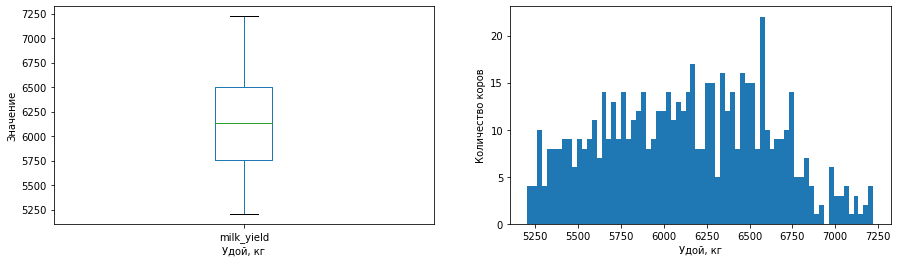

In [67]:
column_analiser(
    ferma_data_df,
    'milk_yield',
    x_label=['Удой, кг', 'Удой, кг'],
    y_label=['Значение', 'Количество коров'],
    print_unique=False
               )

,id,milk_yield,energy_feed_unit,raw_protein,sugar_protein_ratio,breed,pasture_type,dad_breed,fatness,protein,milk_taste,age,dad_name


,id,milk_yield,energy_feed_unit,raw_protein,sugar_protein_ratio,breed,pasture_type,dad_breed,fatness,protein,milk_taste,age,dad_name


 Поле : milk_yield - Удой, кг 

count     629.000000
mean     6125.979332
std       475.478118
min      5204.000000
25%      5751.000000
50%      6133.000000
75%      6501.000000
max      7222.000000
Name: milk_yield, dtype: float64


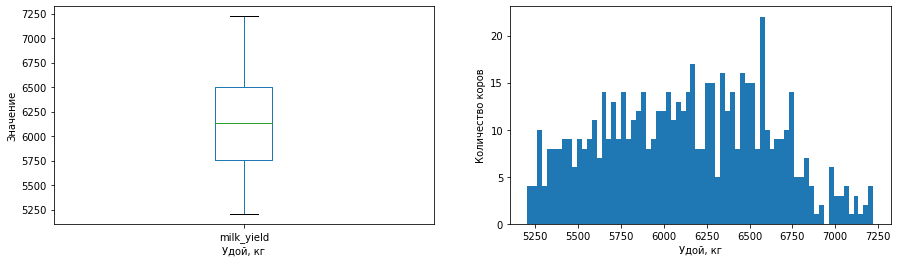

In [69]:
display(ferma_data_df.query('milk_yield > 40000'))
ferma_data_df.loc[ferma_data_df['milk_yield'] > 40000, ['milk_yield']] = ferma_data_df['milk_yield'].median()
display(ferma_data_df.query('milk_yield > 40000'))

column_analiser(
    ferma_data_df,
    'milk_yield',
    x_label=['Удой, кг', 'Удой, кг'],
    y_label=['Значение', 'Количество коров'],
    print_unique=False
               )

 Поле : fatness - Жирность, % 

count    629.000000
mean       3.603657
std        0.168656
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: fatness, dtype: float64


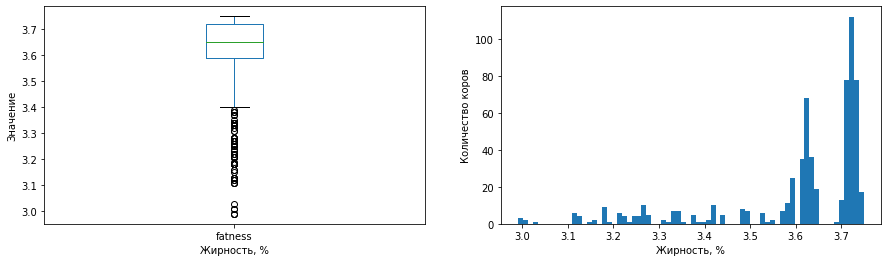

In [71]:
#column_analiser(ferma_data_df, 'fatness', x_label='Жирность, %', y_label='', print_unique=True)
column_analiser(
    ferma_data_df,
    'fatness',
    x_label=['Жирность, %', 'Жирность, %'],
    y_label=['Значение', 'Количество коров'],
    print_unique=False)

 Поле : protein - Белок, % 

count    629.000000
mean       3.075671
std        0.002549
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: protein, dtype: float64


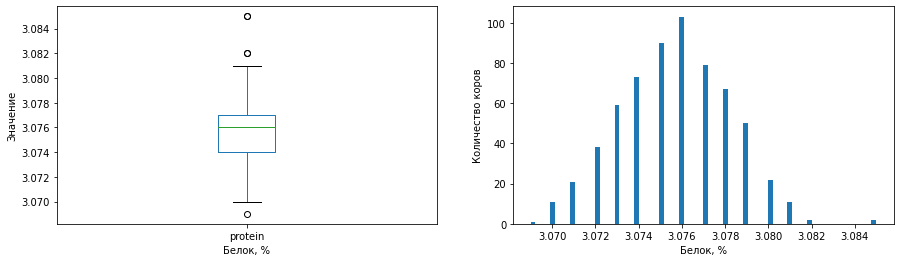

In [73]:
#column_analiser(ferma_data_df, 'protein', x_label='Белок, %', y_label='', print_unique=True)
column_analiser(
    ferma_data_df,
    'protein',
    x_label = ['Белок, %', 'Белок, %'],
    y_label = ['Значение', 'Количество коров'],
    print_unique = False)

 Поле : energy_feed_unit - ЭКЕ (Энергетическая кормовая единица) 

count    629.000000
mean      14.543879
std        1.306408
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: energy_feed_unit, dtype: float64


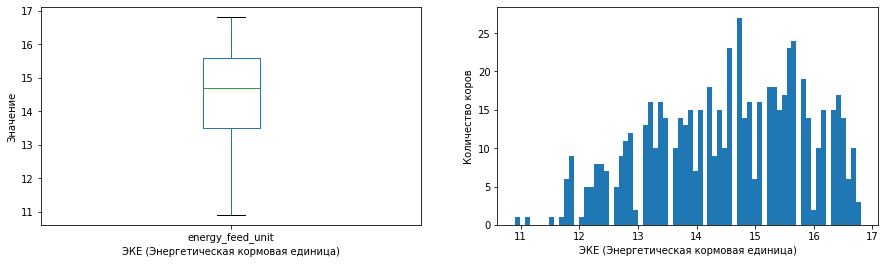

In [76]:
column_analiser(
    ferma_data_df,
    'energy_feed_unit',
    x_label = ['ЭКЕ (Энергетическая кормовая единица)', 'ЭКЕ (Энергетическая кормовая единица)'],
    y_label = ['Значение', 'Количество коров'],
    print_unique = False)

 Поле : raw_protein - Сырой протеин, г 

count     629.000000
mean     1923.364070
std       182.956251
min      1660.000000
25%      1771.000000
50%      1888.000000
75%      2062.000000
max      2349.000000
Name: raw_protein, dtype: float64


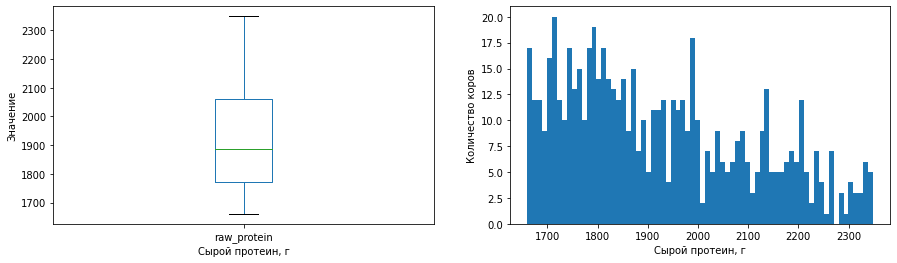

In [77]:
#column_analiser(ferma_data_df, 'raw_protein', x_label='Сырой протеин, г', y_label='', print_unique=False)
column_analiser(
    ferma_data_df,
    'raw_protein',
    x_label = ['Сырой протеин, г', 'Сырой протеин, г'],
    y_label = ['Значение', 'Количество коров'],
    print_unique = False)

 Поле : sugar_protein_ratio - СПО (Сахаро-протеиновое соотношение) 

count    629.000000
mean       0.913116
std        0.032203
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: sugar_protein_ratio, dtype: float64


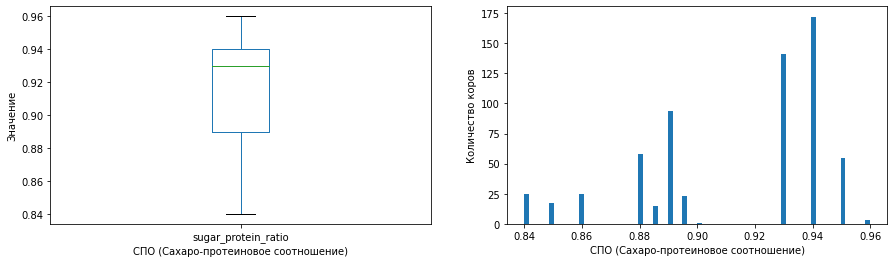

In [79]:
column_analiser(
    ferma_data_df,
    'sugar_protein_ratio',
    x_label = ['СПО (Сахаро-протеиновое соотношение)', 'СПО (Сахаро-протеиновое соотношение)'],
    y_label = ['Значение', 'Количество коров'],
    print_unique = False)

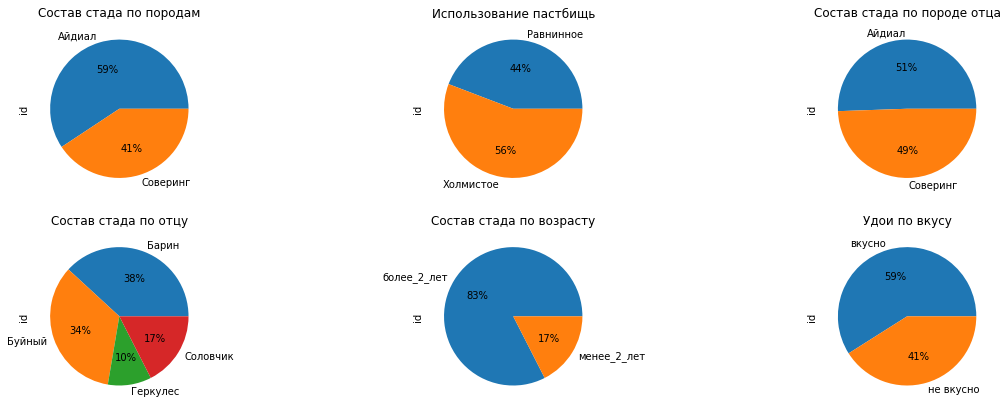

In [29]:
indexes = ['breed', 'pasture_type', 'dad_breed', 'dad_name', 'age', 'milk_taste']
titles = [
    'Состав стада по породам',
    'Использование пастбищь',
    'Состав стада по породе отца',
    'Состав стада по отцу',
    'Состав стада по возрасту',
    'Удои по вкусу']

categorical_property_visualization(
    data_= ferma_data_df,
    indexes_= indexes,
    titles_= titles,
    values_='id',
    aggfunc_='count')

#### cow_buy_df

 Поле : fatness - Жирность 

count    20.000000
mean      3.577500
std       0.126818
min       3.340000
25%       3.510000
50%       3.590000
75%       3.650000
max       3.770000
Name: fatness, dtype: float64


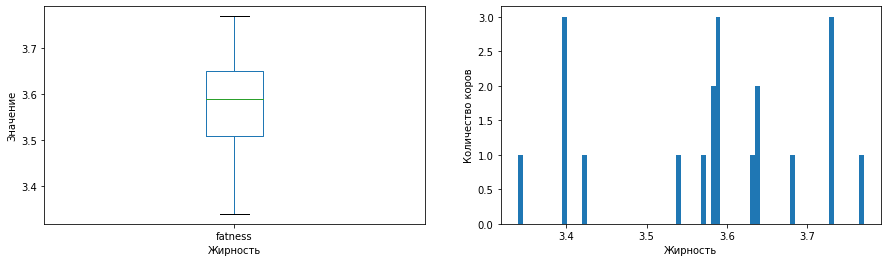

 Поле : protein - Белок 

count    20.000000
mean      3.069500
std       0.010339
min       3.046000
25%       3.064000
50%       3.074000
75%       3.076000
max       3.081000
Name: protein, dtype: float64


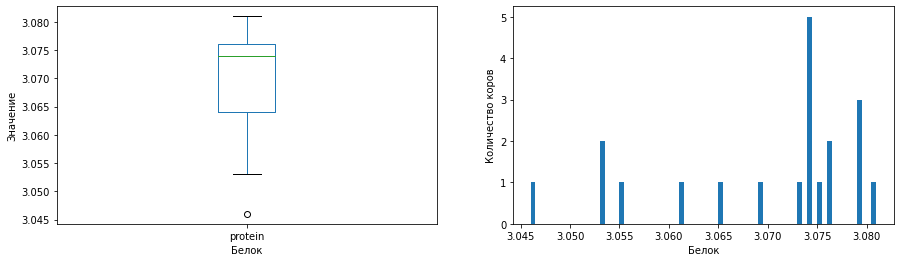

In [80]:
#column_analiser(cow_buy_df, 'fatness', x_label='Жирность', y_label='', print_unique=False)
column_analiser(
    cow_buy_df,
    'fatness',
    x_label = ['Жирность', 'Жирность'],
    y_label = ['Значение', 'Количество коров'],
    print_unique = False)

#column_analiser(cow_buy_df, 'protein', x_label='Белок', y_label='', print_unique=False)
column_analiser(
    cow_buy_df,
    'protein',
    x_label = ['Белок', 'Белок'],
    y_label = ['Значение', 'Количество коров'],
    print_unique = False)


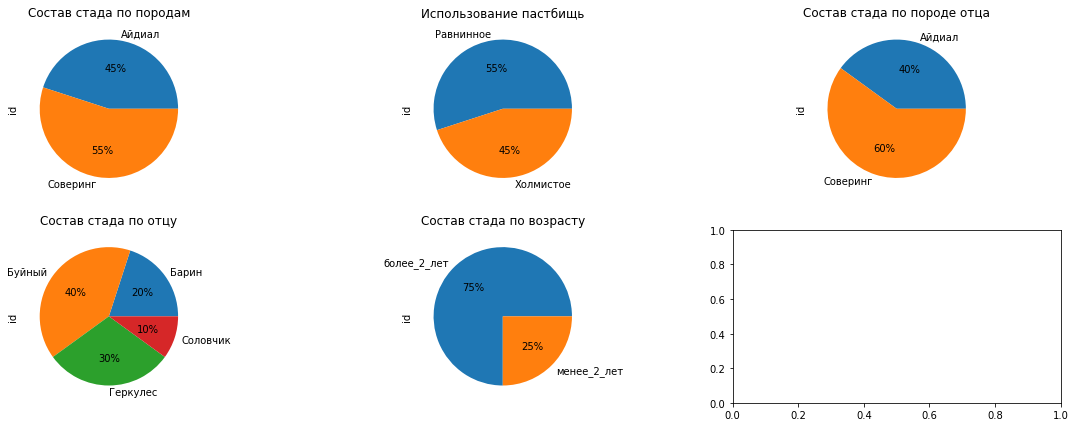

In [31]:
indexes = ['breed', 'pasture_type', 'dad_breed', 'dad_name', 'age']
titles = [
    'Состав стада по породам',
    'Использование пастбищь',
    'Состав стада по породе отца',
    'Состав стада по отцу',
    'Состав стада по возрасту']

cow_buy_df['id'] = np.arange(len(cow_buy_df))
categorical_property_visualization(
    data_= cow_buy_df,
    indexes_= indexes,
    titles_= titles,
    values_='id',
    aggfunc_='count')
cow_buy_df = cow_buy_df.drop('id', axis=1)

### Выводы по исследовательскому анализу

**Приведение значений категориальных полей к идентичным значениям.**<br>

Таблица **ferma_main_df:**<br>

&ensp;&ensp;&ensp;&ensp;**yield_kg - удой :** Обнаружен выброс, значительно превышающий максимальное значение. Значение выброса заменено на медианное. После исключения выброса распределение значений стремиться к нормалному.<br>
&ensp;&ensp;&ensp;&ensp;**energy_feed_unit - ЭКЕ :** распределение значений стремиться к нормалному, выбросов нет.<br>
&ensp;&ensp;&ensp;&ensp;**raw_protein - сырой протеин :** - распределение значений не стремиться к нормалному, выбросов нет.<br>
&ensp;&ensp;&ensp;&ensp;**sugar_protein_ratio - СПО :** - распределение похоже на линейное, выбросов нет.<br>
&ensp;&ensp;&ensp;&ensp;**fatness - жирность :**- распределение значений не стремиться к нормалному, присутствует большое количество выбросов. На жирность молока могут влиять факторы, не отраженные в предоставленных источниках: Сезон, Условия содержания, Время доения, Возраст и количества отелов.<br>
&ensp;&ensp;&ensp;&ensp;**protein - Белок :** - данные нормально распределены, значения содержат выброы, при этом значение выброса не является аномальным.<br>
&ensp;&ensp;&ensp;&ensp;**breed - порода :** - в составе стада преобладает порода Айдиал 59%<br>
&ensp;&ensp;&ensp;&ensp;**pasture_type - тип пастбища :** - в большей степени преобладает Холмистый выпас 56%<br>
&ensp;&ensp;&ensp;&ensp;**dad_breed - порода отца коровы** - распределена почти поровну 51% - Айдиал и 49% - Соверинг.<br>
&ensp;&ensp;&ensp;&ensp;**milk_taste - вкус молока** - преобладает вкусное молоко 59%<br>
&ensp;&ensp;&ensp;&ensp;**age - возраст** - стадо состоит на 82% из коров, старше 2х лет.<br>

Таблица **ferma_main_df:**<br>

&ensp;&ensp;&ensp;&ensp;**fatness - жирность :**- распределение значений не стремиться к нормалному, Выбросов нет.<br>
&ensp;&ensp;&ensp;&ensp;**protein - Белок :** - распределение значений не стремиться к нормалному, Выбросов нет.<br>
&ensp;&ensp;&ensp;&ensp;**breed - порода :** - в составе стада преобладает порода Соверинг 55%<br>
&ensp;&ensp;&ensp;&ensp;**pasture_type - тип пастбища :** - в большей степени преобладает Равнинный выпас 55%<br>
&ensp;&ensp;&ensp;&ensp;**dad_breed - порода отца коровы** - распределена следующим образом: 40% - Айдиал и 60% - Соверинг.<br>
&ensp;&ensp;&ensp;&ensp;**age - возраст** - состав продаваемых коров на 75% из коров, старше 2х лет.<br>


&ensp;&ensp;&ensp;&ensp; **Улучшение данных:**<br>
* Провести анализ записей в которых содержаться выбросы. Выявить возможные зависимости выбросов от значений других свойств.
* Согласовать с заказчиком возможные корректировки данных по свойствам, содержащим выбросы.

## Корреляционный анализ

### Матрица корреляции

,milk_yield,energy_feed_unit,raw_protein,sugar_protein_ratio,fatness,protein
milk_yield,1.000000,0.763352,0.436717,0.788193,0.687247,-0.005716
energy_feed_unit,0.763352,1.000000,0.387436,0.740029,0.688273,-0.013803
raw_protein,0.436717,0.387436,1.000000,0.484731,0.395286,0.228104
sugar_protein_ratio,0.788193,0.740029,0.484731,1.000000,0.699606,0.109788
fatness,0.687247,0.688273,0.395286,0.699606,1.000000,0.042541
protein,-0.005716,-0.013803,0.228104,0.109788,0.042541,1.000000


<AxesSubplot:>

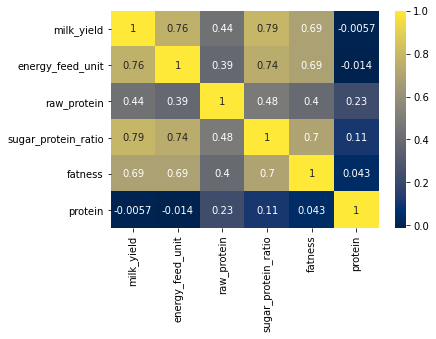

In [32]:
numeric_column = ['milk_yield', 'energy_feed_unit', 'raw_protein', 'sugar_protein_ratio', 'fatness', 'protein']
display(ferma_data_df[numeric_column].corr(method='spearman'))
sns.heatmap(ferma_data_df[numeric_column].corr(method='spearman'), annot=True, cmap='cividis')

### Диаграммы рассеяния

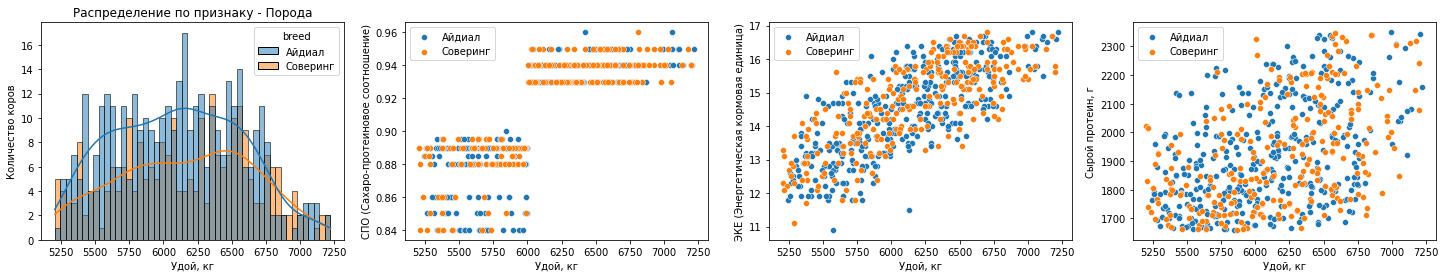

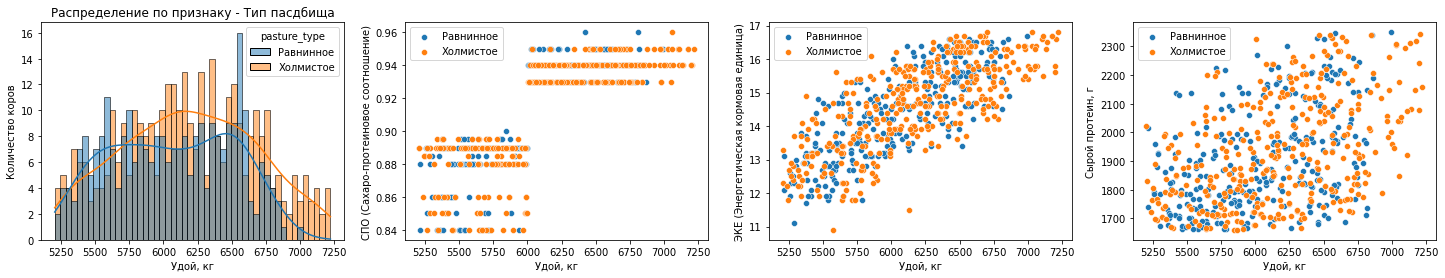

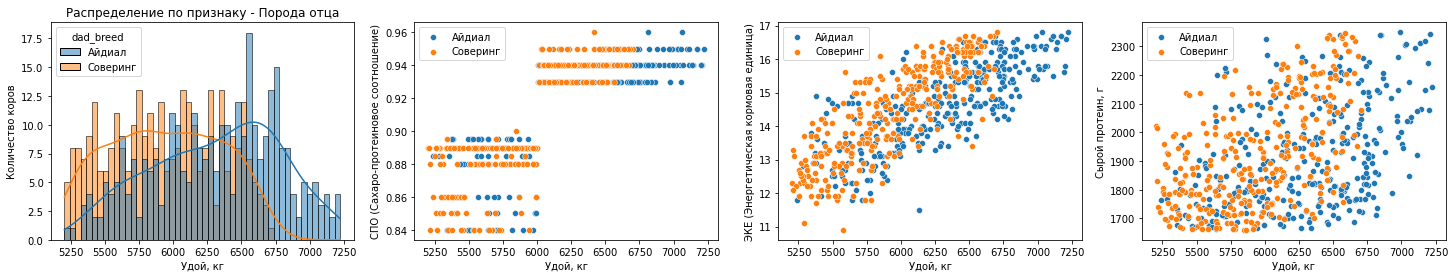

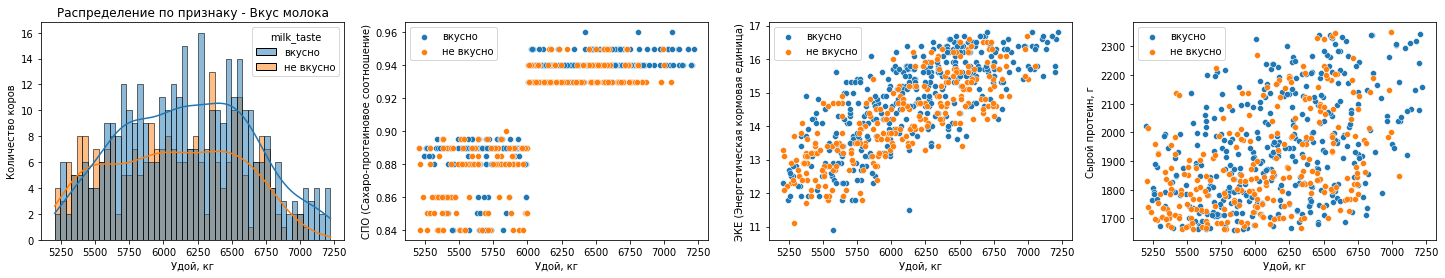

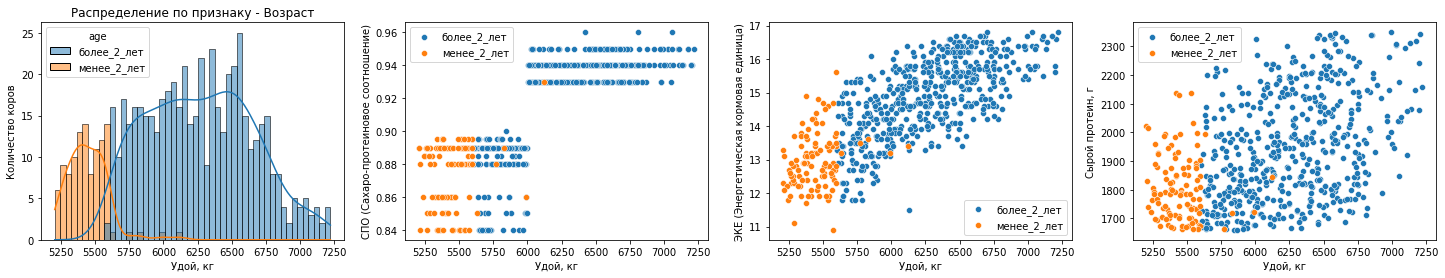

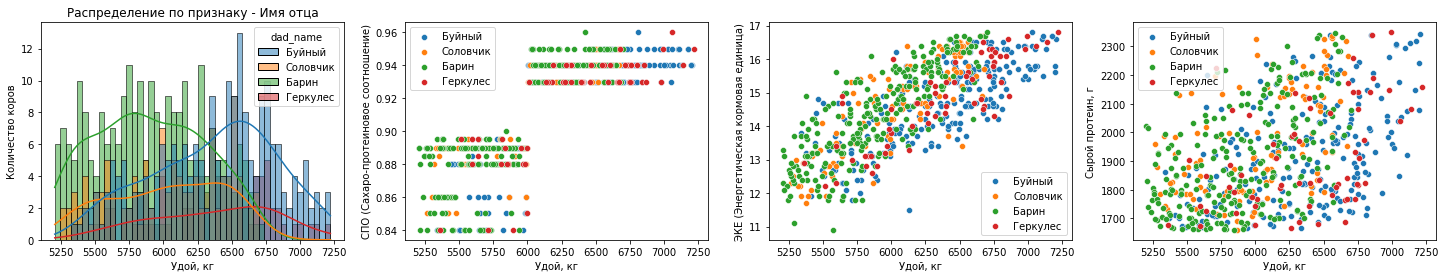

In [33]:
research_field_ = 'milk_yield'
research_field_title = 'Удой, кг'

property_fields_ = [
    'sugar_protein_ratio',
    'energy_feed_unit',
    'raw_protein'] #, 'fatness'

property_labels_ = [
    'СПО (Сахаро-протеиновое соотношение)',
    'ЭКЕ (Энергетическая кормовая единица)',
    'Сырой протеин, г'] #, 'Жирность'

data_fields_ = [
    'breed',
    'pasture_type',
    'dad_breed',
    'milk_taste',
    'age',
    'dad_name']

labels_ = [
    'Порода',
    'Тип пасдбища',
    'Порода отца',
    'Вкус молока',
    'Возраст',
    'Имя отца']

column_count_ = len(property_fields_) + 1

row_count_ = 1
subplot_index_ = 1
data_field_ind = 0

for data in data_fields_:
#    print('Дата - ', data)
    plt.figure(figsize=[25, 4])

    subplot_index_ = 1
    plt.subplot(1, column_count_, subplot_index_)
    sns.histplot(x=research_field_, kde=True, hue=data, data=ferma_data_df, bins=50)
    title_str = f'Распределение по признаку - {labels_[data_field_ind]}'
    plt.title(title_str)
    plt.xlabel(research_field_title)
    plt.ylabel('Количество коров')
    #plt.legend(title=' ', labels=ferma_data_df[data]) #.unique()
    
    subplot_index_ += 1
    property_fields = 0
    for property in property_fields_:
#        print('Свойство - ', property)
#        print('subplot_index_ - ', subplot_index_)
        for value in ferma_data_df[data].unique():
            query_str = f'{data} == "{value}"'
#            print('query_str = ', query_str)
#            print(ferma_data_df.query(query_str))

            plt.subplot(1, column_count_, subplot_index_)
            sns.scatterplot(data=ferma_data_df.query(query_str), x=research_field_, y=property, label = value)
        subplot_index_ += 1
        plt.ylabel(property_labels_[property_fields])
        plt.xlabel(research_field_title)
        property_fields += 1
    data_field_ind += 1
    plt.show()

### Выводы по кореляционному анализу

* Выбросы жирности объясняются возрастом коров (чем старше корова, тем количество отелов больше. Жирность достигает пика после шестого отела. Данные об отелах не предоставлены). У коров старше 2х лет жирность молока больше.
* Коровы до 2 лет содержатся на кормах с меньшим СПО(до 0,90 единиц). Прослеживается четкая граница их удойности примерно до 5300 килограмм, с возрастом удой коров увеличиваетсяю. Для роста удоя необходимо увеличивать СПО. Минимальное содержание СПО в корма коров старше 2х лет > 0.92.
* Диаграмма Удой/ЭКЕ в разрезе Возраст показывает, что коровы старше 2х лет, в основном, содержаться на корме с более высокой ЭКЕ, что позволяет увеличить Удой.
* У коров от отцов породы "Айдиал" при переходе на корм с показателем СПО > 0.92 единицы прослеживаются большие удои по сравнению с коровами от отцов породы "Северинг", при сравнении коров по породам отцов без учета СПО такая зависимость не обнаружена.
* Корреляция Спирмена указывает на высокие показатели коррреляции Удоев от ЭКЕ = 0,76 и СПО = 0,79.
* Показатель коррреляции между Удоями и Жирностью = 0,69. При этом, более высокая жирность характерна для коров, старше 2х лет. Взрослыые коровы составляют 83% стада и содержаться на кормах с более высоким ЭКЕ и СПО.
* Между входными параметрами отсутствует корреляции выше 0,9. При обучении модели учитывать мультиколлинеарность нет необходимости.

## Обучение модели линейной регрессии

### Первая модель

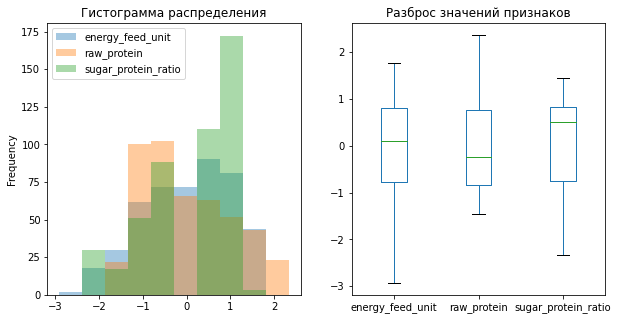

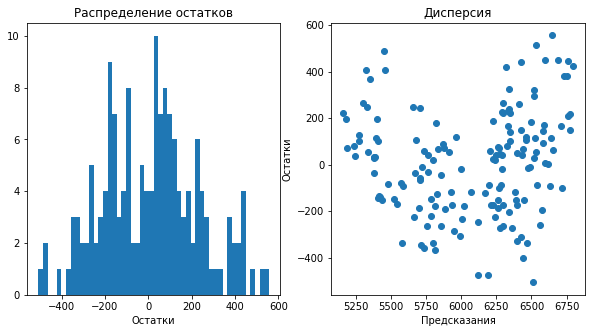

Остатки медиана = 30.75 
Остатки среднее = 12.05 

R² = 0.82  [−∞, 1]
MSE = 49615.05, [0, +∞]
RMSE = 222.74, [0, +∞]
MAE = 181.04 [0, +∞]


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [34]:
cat_columns = ['breed', 'pasture_type', 'dad_breed', 'age']
num_columns = ['energy_feed_unit', 'raw_protein', 'sugar_protein_ratio']

# Целевой признак
y = ferma_data_df['milk_yield']

# Входные признаки
X = ferma_data_df[[
    'energy_feed_unit',
    'raw_protein',
    'sugar_protein_ratio',
    'breed',
    'pasture_type',
    'dad_breed',
    'age',
    'dad_name']]

#display(y.head(3))
#display(X.head(3))

predictions_1, encoder_1, encoder_columns_1, scaler_1, model_lr_1 = model_training(X, y, cat_columns, num_columns)

### Вторая модель

[0 1]


/tmp/ipykernel_180/3709839613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['energy_feed_unit'] = X['energy_feed_unit'].apply(lambda x: x**2)
/tmp/ipykernel_180/3709839613.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sugar_protein_ratio'] = X['sugar_protein_ratio'].apply(lambda x: 1 if x > 0.92 else 0)


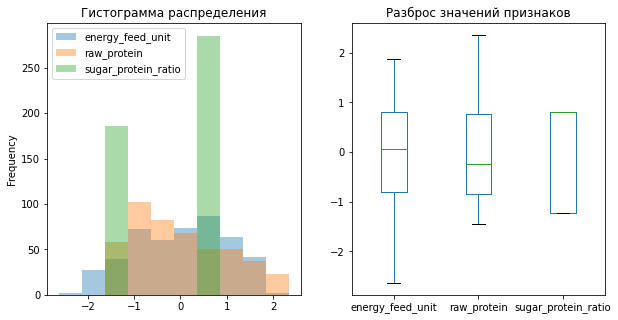

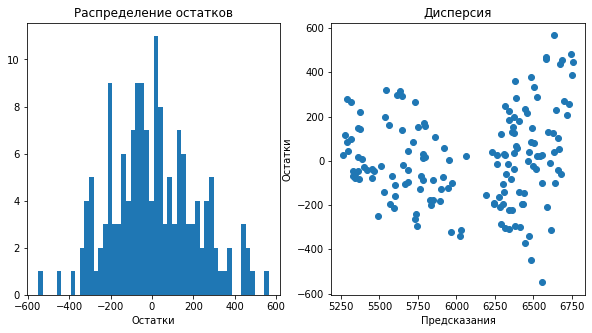

Остатки медиана = 0.24 
Остатки среднее = 10.49 

R² = 0.84  [−∞, 1]
MSE = 42834.42, [0, +∞]
RMSE = 206.96, [0, +∞]
MAE = 163.89 [0, +∞]


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [35]:
X['energy_feed_unit'] = X['energy_feed_unit'].apply(lambda x: x**2)
# Граница 0.92 ???????????????
X['sugar_protein_ratio'] = X['sugar_protein_ratio'].apply(lambda x: 1 if x > 0.92 else 0)
print(X['sugar_protein_ratio'].unique())

predictions_2, encoder_2, encoder_columns_2, scaler_2, model_lr_2 = model_training(X, y, cat_columns, num_columns)

### Третья модель

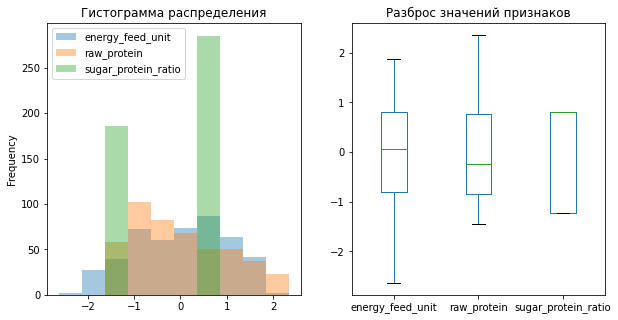

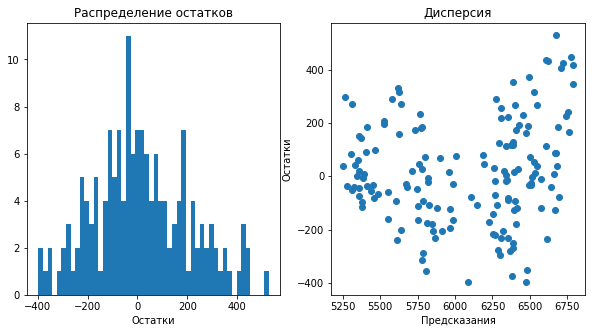

Остатки медиана = -1.82 
Остатки среднее = 16.60 

R² = 0.86  [−∞, 1]
MSE = 37651.41, [0, +∞]
RMSE = 194.04, [0, +∞]
MAE = 153.40 [0, +∞]


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [36]:
cat_columns = ['breed', 'pasture_type', 'dad_breed', 'age', 'dad_name']
num_columns = ['energy_feed_unit', 'raw_protein', 'sugar_protein_ratio']

predictions_3, encoder_3, encoder_columns_3, scaler_3, model_lr_3 = model_training(X, y, cat_columns, num_columns)

### Прогноз удоя коров, предлагаемых ЭкоФермой

In [37]:
X_tmp_df = cow_buy_df

# Поля со средними значениями из ferma_data_df + 5%
X_tmp_df['energy_feed_unit'] = ferma_data_df['energy_feed_unit'].mean()*1.05
X_tmp_df['raw_protein'] = (ferma_data_df['raw_protein'].mean()*1.05).astype(int)
X_tmp_df['sugar_protein_ratio'] = ferma_data_df['sugar_protein_ratio'].mean()*1.05

#Соответствие полей
columns = ferma_data_df.columns
#print(columns)
columns = columns.drop(labels=['id', 'milk_yield', 'milk_taste'])
X_tmp_df = X_tmp_df[columns]

# Удаление признаков не влияющих на удой
X_tmp_df = X_tmp_df.drop(['fatness', 'protein'], axis=1)

# Преобразование полей по 2 модели
X_tmp_df['sugar_protein_ratio'] = X_tmp_df['sugar_protein_ratio'].apply(lambda x: 1 if x > 0.92 else 0)
X_tmp_df['energy_feed_unit'] = X_tmp_df['energy_feed_unit'].apply(lambda x: x**2)

display(X_tmp_df.head(2))
display(X.head(2))

,energy_feed_unit,raw_protein,sugar_protein_ratio,breed,pasture_type,dad_breed,age,dad_name
0,233.205675,2019,1,Айдиал,Холмистое,Айдиал,более_2_лет,Геркулес
1,233.205675,2019,1,Айдиал,Равнинное,Соверинг,менее_2_лет,Буйный


,energy_feed_unit,raw_protein,sugar_protein_ratio,breed,pasture_type,dad_breed,age,dad_name
0,201.64,1743,0,Айдиал,Равнинное,Айдиал,более_2_лет,Буйный
1,163.84,2138,0,Айдиал,Равнинное,Соверинг,менее_2_лет,Соловчик


In [38]:
cat_columns = ['breed', 'pasture_type', 'dad_breed', 'age', 'dad_name'] 
num_columns = ['energy_feed_unit', 'raw_protein', 'sugar_protein_ratio']

scaler = scaler_3
encoder = encoder_3
model_lr = model_lr_3

# подготовка признаков (масштабирование и кодирование)
X_tmp_df_ohe = encoder.transform(X_tmp_df[cat_columns])
encoder_col_names = encoder.get_feature_names_out() #get_feature_names_out

X_tmp_df_scaled = scaler.transform(X_tmp_df[num_columns])

X_tmp_df_ohe = pd.DataFrame(X_tmp_df_ohe, columns = encoder_col_names)
X_tmp_df_scaled = pd.DataFrame(X_tmp_df_scaled, columns = num_columns)
X_tmp_df = pd.concat([X_tmp_df_ohe, X_tmp_df_scaled], axis = 1)

# предсказание на данных
predictions = model_lr.predict(X_tmp_df)

# Таблица для покупок
cow_buy_predict_df = cow_buy_df.copy()
cow_buy_predict_df['predict_yield'] = predictions.astype(int)

In [39]:
print('')
print(bold_start, 'Прогнозы удоев показывает, что все коровы, представленные ЭкоФермой будут давать более 6000 кг молока в год.', bold_end)
print('')
display(cow_buy_predict_df.query('predict_yield > 6000'))


 Прогнозы удоев показывает, что все коровы, представленные ЭкоФермой будут давать более 6000 кг молока в год. 



,breed,pasture_type,dad_breed,dad_name,fatness,protein,age,energy_feed_unit,raw_protein,sugar_protein_ratio,predict_yield
0,Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.271073,2019,0.958772,6550
1,Айдиал,Равнинное,Соверинг,Буйный,3.54,3.081,менее_2_лет,15.271073,2019,0.958772,6294
2,Соверинг,Равнинное,Соверинг,Барин,3.59,3.074,более_2_лет,15.271073,2019,0.958772,6288
3,Соверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.271073,2019,0.958772,6594
4,Соверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.271073,2019,0.958772,6542
5,Соверинг,Равнинное,Соверинг,Геркулес,3.63,3.053,менее_2_лет,15.271073,2019,0.958772,6340
6,Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.271073,2019,0.958772,6550
7,Айдиал,Равнинное,Соверинг,Буйный,3.57,3.079,более_2_лет,15.271073,2019,0.958772,6502
8,Соверинг,Равнинное,Соверинг,Барин,3.59,3.074,более_2_лет,15.271073,2019,0.958772,6288
9,Соверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.271073,2019,0.958772,6386


### Вывод по прогнозу Удоев (линейная регрессия)

| Метрика\Характеристика | Модель_1 |Модель_2 |Модель_3
|---------------|--------|---------|----
|R² (-∞, 1)|0.82 |0.84|0.86|
|MSE  (0, +∞)|49615.05 |42834.42 |37651.41|
|RMSE (0, +∞)|222.74 |206.96|194.04|
|MAE (0, +∞)|181.04 |163.89|153.40|
|Остатки медиана |30.75|0.24 |-1.82|
|Остатки среднее |12.05|10.49 |16.60|

**Первая модель**
* Значение R² = 0,82 указывает насколько модель линейной регрессии соответствует данным, на которых она построена. Значение R² = 0,82 - приемлемо, но не идеально.
* Гистограмма остатков приближается к нормальному закону распределения. Есть значительное различие между средним и медианным значением ошибки (остатков).
* Дисперсия остатков неравномерна, присутствуют скученности.

**Вторая модель**
* Перевод СПО в бинарный признак с границей в 0.92 еденицы и возведение значений ЭКЕ в квадрат привело к увеличению значения  R²на 0.02  по сравнению с первой моделью.
* Гистограмма остатков приближается к нормальному распределения, разница значений медианы и среднего сократилась.
*  Дисперсия остатков неравномерна, присутствуют скученности.

**Третья модель**
* Для улучшения показателей модели ввели дополнительный признак - Имя отца. Ввод нового признака увеличил значение R^2 еще на 0,02.
* Гистограмма остатков приближается к нормальному закону распределения, скученность уменьшилась. По сравнению со второй моделью, разница медианы и среднего величилась.
* Дисперсия остатков приближается к нормальному закону, скученность уменьшилась.

**Прогноз Удоев**
* Метрики Третьей модели наиболее приемлемы для использования именно этой модели для формирования прогнозов.
* Доверительный интервал 95% указывает на то, что значения прогноза Удоев будет находиться в интервале (5998.098, 6141.77) кг.
* **Прогнозы удоев показывает, что все коровы, представленные ЭкоФермой будут давать более 6000 кг молока в год.**

## Обучение модели логистической регрессии

### Формирование данных

In [40]:
#display(ferma_main_df)

cat_columns = ['breed', 'pasture_type', 'dad_breed', 'age', 'dad_name']
num_columns = ['milk_yield', 'energy_feed_unit', 'raw_protein', 'sugar_protein_ratio', 'fatness', 'protein']

# Определение входных и целевого признаков
X = ferma_data_df.drop('milk_taste', axis=1)
y = ferma_data_df['milk_taste']
X_tmp_df = cow_buy_predict_df

# перевод данных по целевому признаку в числовой формат Вкусно = 1, Не вкусно = 0
y = y.apply(lambda x: 0 if x == 'не вкусно' else 1)

# Переименование полей "прогноз удоев" на "удои": predict_yield --> milk_yield
X_tmp_df.columns = X_tmp_df.columns.str.replace('predict_yield', 'milk_yield')

# Удаление признаков (полей) не влияющих на удой
X = X.drop(['id'], axis=1)

# Сортировка столбцов
columns = X.columns
X_tmp_df = X_tmp_df[columns]

# Изменение данных по аналогии со второй моделью
X['sugar_protein_ratio'] = X['sugar_protein_ratio'].apply(lambda x: 1 if x > 0.92 else 0)
X['energy_feed_unit'] = X['energy_feed_unit'].apply(lambda x: x**2)

X_tmp_df['sugar_protein_ratio'] = X_tmp_df['sugar_protein_ratio'].apply(lambda x: 1 if x > 0.92 else 0)
X_tmp_df['energy_feed_unit'] = X_tmp_df['energy_feed_unit'].apply(lambda x: x**2)

X_tmp_df[['milk_yield', 'raw_protein']] = ferma_data_df[['milk_yield', 'raw_protein']].astype('int')

In [41]:
X.info()
X_tmp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   milk_yield           629 non-null    float64
 1   energy_feed_unit     629 non-null    float64
 2   raw_protein          629 non-null    int64  
 3   sugar_protein_ratio  629 non-null    int64  
 4   breed                629 non-null    object 
 5   pasture_type         629 non-null    object 
 6   dad_breed            629 non-null    object 
 7   fatness              629 non-null    float64
 8   protein              629 non-null    float64
 9   age                  629 non-null    object 
 10  dad_name             629 non-null    object 
dtypes: float64(4), int64(2), object(5)
memory usage: 75.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               ---

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
X,
y,
random_state=RANDOM_STATE
)

# подготовка признаков (масштабирование и кодирование)
try:
    encoder = OneHotEncoder(drop = 'first', sparse_output = False, handle_unknown='ignore')
except:
    encoder = OneHotEncoder(drop = 'first', sparse = False)

#encoder = OneHotEncoder(drop='first', sparse_output=False) #sparse
X_train_ohe = encoder.fit_transform(X_train[cat_columns])
X_test_ohe = encoder.transform(X_test[cat_columns])

try:
    encoder_columns = encoder.get_feature_names_out()
except:
    encoder_columns = encoder.get_feature_names()


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_columns])
X_test_scaled = scaler.transform(X_test[num_columns])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_columns)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_columns)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_columns)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# Обучение
clf = LogisticRegression(random_state=RANDOM_STATE)
clf = clf.fit(X_train, y_train)

# Предсказание
y_pred = clf.predict(X_test)

,breed_Соверинг,pasture_type_Холмистое,dad_breed_Соверинг,age_менее_2_лет,dad_name_Буйный,dad_name_Геркулес,dad_name_Соловчик,milk_yield,energy_feed_unit,raw_protein,sugar_protein_ratio,fatness,protein,milk_taste
breed_Соверинг,1.000000,0.132359,0.087788,-0.086872,-0.012914,-0.156657,-0.104081,0.087851,0.115101,0.007524,0.037239,0.086396,-0.312344,-0.101808
pasture_type_Холмистое,0.132359,1.000000,0.019513,-0.069637,0.037797,-0.146534,-0.071857,0.126164,0.078313,0.077451,0.095107,-0.024505,0.107390,-0.025459
dad_breed_Соверинг,0.087788,0.019513,1.000000,0.268728,-0.720994,-0.331476,0.355126,-0.400274,-0.057652,0.027859,-0.283004,-0.017468,-0.034625,-0.050546
age_менее_2_лет,-0.086872,-0.069637,0.268728,1.000000,-0.259015,-0.070678,0.105867,-0.642718,-0.515228,-0.242811,-0.522490,-0.487844,0.000180,-0.057078
dad_name_Буйный,-0.012914,0.037797,-0.720994,-0.259015,1.000000,-0.252559,-0.330197,0.375508,0.032582,0.030455,0.271913,0.063928,0.066024,0.041102
dad_name_Геркулес,-0.156657,-0.146534,-0.331476,-0.070678,-0.252559,1.000000,-0.151807,0.132528,0.051715,-0.074727,0.076114,-0.004949,-0.033893,0.010365
dad_name_Соловчик,-0.104081,-0.071857,0.355126,0.105867,-0.330197,-0.151807,1.000000,-0.073912,0.050795,0.146316,-0.013991,0.065310,0.007632,0.033225
milk_yield,0.087851,0.126164,-0.400274,-0.642718,0.375508,0.132528,-0.073912,1.000000,0.741153,0.420905,0.831913,0.580227,0.018878,0.124692
energy_feed_unit,0.115101,0.078313,-0.057652,-0.515228,0.032582,0.051715,0.050795,0.741153,1.000000,0.397141,0.692745,0.637747,0.004039,0.100403
raw_protein,0.007524,0.077451,0.027859,-0.242811,0.030455,-0.074727,0.146316,0.420905,0.397141,1.000000,0.401210,0.350746,0.263610,-0.051309


Text(0.5, 0.98, 'Корреляция нормализованных значений')

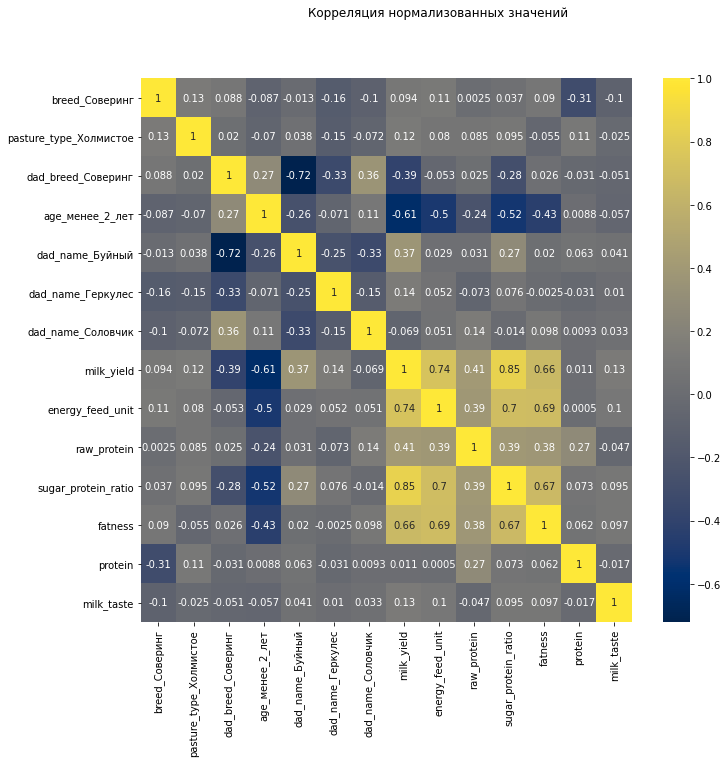

In [43]:
# Таблица и Матрица корреляций
x_corr = X_train
x_corr['milk_taste'] = y_train
display(x_corr.corr())

fig, ax = plt.subplots(figsize=(11, 10))
sns.heatmap(x_corr.corr(method="spearman"), annot=True, cmap='cividis');
plt.suptitle('Корреляция нормализованных значений')

Text(0.5, 15.0, 'Predicted')

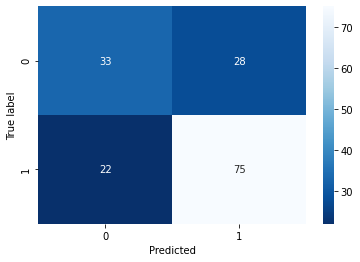

In [44]:
# Матрица ошибок
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted')

In [45]:
# Расчет показателей
accuracy = accuracy_score(y_test, y_pred)
print(bold_start, 'accuracy: ', bold_end, round(accuracy, 2), bold_start, '(Доля правильных ответов)', bold_end)

precision = precision_score(y_test, y_pred) 
print(bold_start, 'precision: ', bold_end, round(precision, 2), bold_start, '(FP - False Positive Err)', bold_end)

recall = recall_score(y_test, y_pred)
print(bold_start, 'recall: ', bold_end, round(recall, 2), bold_start, '(FN - False Negative Err)', bold_end)

 accuracy:   0.68  (Доля правильных ответов) 
 precision:   0.73  (FP - False Positive Err) 
 recall:   0.77  (FN - False Negative Err) 


### Анализ модели логистической регресии

In [46]:
# threshold_df - данные о пороге принадлежности от 0 до 0.9 и соответствующие метрики и значения матрицы ошибок.
threshold_df = pd.DataFrame(columns=[
    'threshold',
    'accuracy',
    'recall',
    'precision',
    'fp',
    'fn',
    'tp',
    'tn'
])
ind = 0
threshold = 0.01
while threshold < 1:
    probably = clf.predict_proba(X_test)
    new_preds = (probably[:, 1] > threshold).astype(int)

    recall = recall_score(y_test, new_preds)
    precision = precision_score(y_test, new_preds, zero_division=0)
    accuracy = accuracy_score(y_test, new_preds)

    # Количество ошибок при текущем пороге 
    tn = np.sum((new_preds == 0) & (y_test == 0))
    fp = np.sum((new_preds == 1) & (y_test == 0))
    fn = np.sum((new_preds == 0) & (y_test == 1))
    tp = np.sum((new_preds == 1) & (y_test == 1))
    
    threshold_df.loc[ind] = [threshold, accuracy, recall, precision, fp, fn, tp, tn]

    threshold = round(threshold + 0.01, 2)
    ind += 1  
#print(threshold_df.query().sort_values(by = ['column_name', 'index'], ascending = )
#threshold_df['f_delta'] = X['sugar_protein_ratio'].apply(lambda x: 1 if x > 0.92 else 0)
threshold_df['f_sum'] = threshold_df['fn'] + threshold_df['fp']

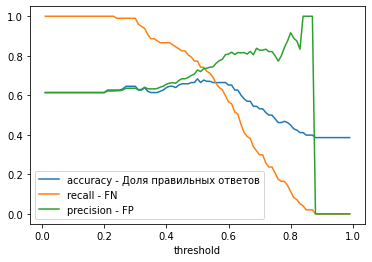

In [47]:
data_ = threshold_df.sort_values(by = ['threshold'], ascending=True)

ax = data_.plot(x='threshold', 
                y=['accuracy', 'recall', 'precision'],
               label=[
                   'accuracy - Доля правильных ответов',
                   'recall - FN',
                   'precision - FP'])
plt.show()

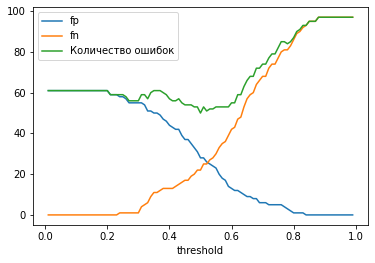

In [48]:
data_ = threshold_df.sort_values(by = ['threshold'], ascending=True)

ax = data_.plot(x='threshold', y=['fp', 'fn', 'f_sum']) #'tn', 'tp', 
plt.legend(['fp', 'fn', 'Количество ошибок']) #'tn', 'tp', 
plt.show()

In [49]:
display(threshold_df['fp'].describe())
print('')
# Минимальный fp
print('')
print(bold_start,'Характеристики модели при минимальном значении fp > 0', bold_end)
display(threshold_df.query('fp > 0').sort_values(by = ['fp'], ascending = False).tail(1))

print('')
print(bold_start,'Характеристики модели при fp = 0', bold_end)
display(threshold_df.query('fp == 0').sort_values(by = ['fp'], ascending = False).tail(1))

# Максимальный accuracy
print(bold_start,'Характеристики модели при максимальном значении accuracy', bold_end)
display(threshold_df.sort_values(by = ['accuracy'], ascending=False).head(1))
# Минимальное количество ошибок - f_sum
print('')
print(bold_start,'Характеристики модели при минимальном колличестве ошибок', bold_end)
display(threshold_df.sort_values(by = ['f_sum'], ascending=True).head(1))
print('')
# Максимальный accuracy и fn > 0
print('')
print(bold_start,'Характеристики модели при минимальном значении порога (threshold) и fn > 0', bold_end)
display(threshold_df.query('fn > 0').sort_values(by = ['fn'], ascending=False).tail(1))

count    99.000000
mean     30.272727
std      24.814750
min       0.000000
25%       5.000000
50%      28.000000
75%      57.500000
max      61.000000
Name: fp, dtype: float64



 Характеристики модели при минимальном значении fp > 0 


,threshold,accuracy,recall,precision,fp,fn,tp,tn,f_sum
82,0.83,0.411392,0.051546,0.833333,1.0,92.0,5.0,60.0,93.0



 Характеристики модели при fp = 0 


,threshold,accuracy,recall,precision,fp,fn,tp,tn,f_sum
98,0.99,0.386076,0.0,0.0,0.0,97.0,0.0,61.0,97.0


 Характеристики модели при максимальном значении accuracy 


,threshold,accuracy,recall,precision,fp,fn,tp,tn,f_sum
49,0.5,0.683544,0.773196,0.728155,28.0,22.0,75.0,33.0,50.0



 Характеристики модели при минимальном колличестве ошибок 


,threshold,accuracy,recall,precision,fp,fn,tp,tn,f_sum
49,0.5,0.683544,0.773196,0.728155,28.0,22.0,75.0,33.0,50.0




 Характеристики модели при минимальном значении порога (threshold) и fn > 0 


,threshold,accuracy,recall,precision,fp,fn,tp,tn,f_sum
23,0.24,0.626582,0.989691,0.623377,58.0,1.0,96.0,3.0,59.0


### Выводы по анализу модели логистической регрессии и прогнозу Вкуса молока

* Значение признака Вкуса молока "вкусное" = 1.
* FP (28 ошибок) - Модель присваивает значение "вкусное" невкусному молоку.
* FN (22 ошибки) - Модель присваивает значение "невкусное" вкусному молоку.
* Обе ошибки могут снизить точность прогноза Вкуса молока, поэтому Доля правильных ответов (accuracy) - целевая метрика оценки модели.
* Максимальное значение accuracy = 0.68 соответствует значению порога threshold = 0.5
<br>
* Минимизации FP - ошибки соответствует порогу принадлежности = 0.83. при этом значение метрик составило accuracy = 0.4 (снижения на 0.28), Recall = 0.05 (снижение на 0.72), Precision = 0.83 (увеличение на с 0.1)
* Минимизации FN - ошибки соответствует порогу принадлежности = 0.24. при этом значение метрик составило accuracy = 0.62 (снижения на 0.02), Recall = 0.98 (рост на 0.21), Precision = 0.62 (сни на на 0.11)
* Пороги 0.83 и 0.24 не оправданы, т.к на этих порогах снижается значение метрики accuracy.

In [50]:
# Минимальный fp
print(bold_start,'Характеристики модели при fp = 0', bold_end)
display(threshold_df.query('fp == 0').sort_values(by = ['fp'], ascending = False).tail(1))
print('')
print(bold_start,'Характеристики модели при минимальном значении fp > 0', bold_end)
display(threshold_df.query('fp > 0').sort_values(by = ['fp'], ascending = False).tail(1))

 Характеристики модели при fp = 0 


,threshold,accuracy,recall,precision,fp,fn,tp,tn,f_sum
98,0.99,0.386076,0.0,0.0,0.0,97.0,0.0,61.0,97.0



 Характеристики модели при минимальном значении fp > 0 


,threshold,accuracy,recall,precision,fp,fn,tp,tn,f_sum
82,0.83,0.411392,0.051546,0.833333,1.0,92.0,5.0,60.0,93.0


### Прогноз вкуса молока покупаемых коров

In [51]:
# Кодирование признаков
X_tmp_df_ohe = encoder.transform(X_tmp_df[cat_columns])

# Масштабирование признаков
X_tmp_df_scaled = scaler.transform(X_tmp_df[num_columns])

X_tmp_df_ohe = pd.DataFrame(X_tmp_df_ohe, columns=encoder_columns)
X_tmp_df_scaled = pd.DataFrame(X_tmp_df_scaled, columns=num_columns)
X_tmp_df = pd.concat([X_tmp_df_ohe, X_tmp_df_scaled], axis=1)

In [52]:
# прогноз на данных с выбранным порогом = 0.83

probably = clf.predict_proba(X_tmp_df)
predictions_precision = (probably[:, 1] > 0.83).astype(int)

 Прогноз Вкуса молока - 0 коров из 20 , предлагаемых ЭкоФермой дают вкусное молоко. 



,breed,pasture_type,dad_breed,dad_name,fatness,protein,age,energy_feed_unit,raw_protein,sugar_protein_ratio,milk_yield,milk_taste_precision,milk_taste
0,Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.271073,2019,0.958772,6550,0,невкусное
1,Айдиал,Равнинное,Соверинг,Буйный,3.54,3.081,менее_2_лет,15.271073,2019,0.958772,6294,0,невкусное
2,Соверинг,Равнинное,Соверинг,Барин,3.59,3.074,более_2_лет,15.271073,2019,0.958772,6288,0,невкусное
3,Соверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.271073,2019,0.958772,6594,0,невкусное
4,Соверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.271073,2019,0.958772,6542,0,невкусное
5,Соверинг,Равнинное,Соверинг,Геркулес,3.63,3.053,менее_2_лет,15.271073,2019,0.958772,6340,0,невкусное
6,Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.271073,2019,0.958772,6550,0,невкусное
7,Айдиал,Равнинное,Соверинг,Буйный,3.57,3.079,более_2_лет,15.271073,2019,0.958772,6502,0,невкусное
8,Соверинг,Равнинное,Соверинг,Барин,3.59,3.074,более_2_лет,15.271073,2019,0.958772,6288,0,невкусное
9,Соверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.271073,2019,0.958772,6386,0,невкусное


 Характеристики стада, предлагаемого Экофермой 


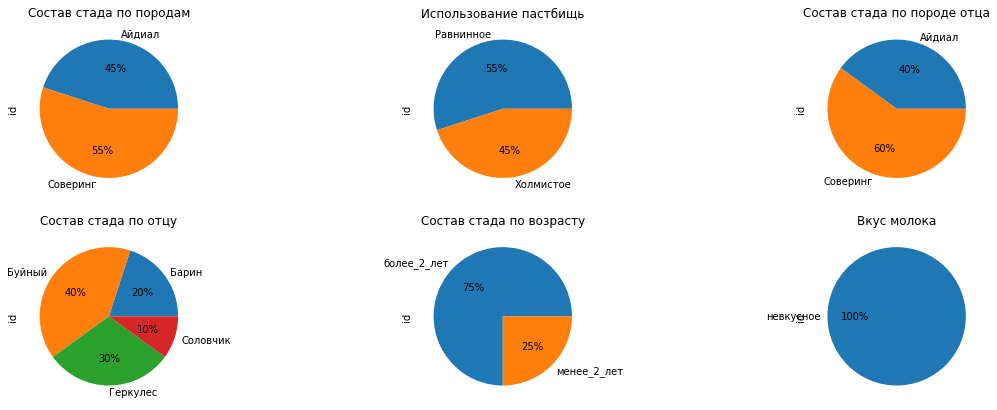

In [53]:
cow_buy_predict_df['milk_taste_precision'] = predictions_precision
cow_buy_predict_df['milk_taste'] = cow_buy_predict_df['milk_taste_precision'].apply(
    lambda x: 'вкусное' if x == 1 else 'невкусное')
(
print(bold_start,
      'Прогноз Вкуса молока -', 
      len(cow_buy_predict_df[cow_buy_predict_df['milk_taste_precision'] == 1]), 'коров из', 
      len(cow_buy_df), ', предлагаемых ЭкоФермой дают вкусное молоко.', bold_end)
)    
print('')
display(cow_buy_predict_df.query('milk_yield > 6000 or milk_taste_precision == 1'))
indexes = ['breed', 'pasture_type', 'dad_breed', 'dad_name', 'age', 'milk_taste']
titles = [
    'Состав стада по породам',
    'Использование пастбищь',
    'Состав стада по породе отца',
    'Состав стада по отцу',
    'Состав стада по возрасту',
    'Вкус молока']

print(
    bold_start,
    'Характеристики стада, предлагаемого Экофермой',
    bold_end)
cow_buy_predict_df['id'] = np.arange(len(cow_buy_df))
categorical_property_visualization(
    data_= cow_buy_predict_df,
    indexes_= indexes,
    titles_= titles,
    values_='id',
    aggfunc_='count'
                                  )
#cow_buy_predict_df = cow_buy_df.drop('id', axis=1)

### Выводы по прогнозу вкуса молока (логистическая регрессия)

* По мнению экспертов вкус молока зависит от: жирности (влияет на насыщенность вкуса), породы коров, гигиены, 
стадия лактации (молокоотделения), количество доек и здоровья особи.
* В предоставленных для построения прогнозов данных есть информация о двух показателях, влияющих на Вкус Молока - жирность и порода.
* По результатам корреляционного анализа предоставленных данных о стаде фермера, зависимости вкуса как от жирность и породы, так и от других характеристик коров нет. 
* Важным условием построения прогнозной модели, является наличие линейной зависимости между входными и прогнозными значениями. На основании модели, построенной на данных, предоставленных Заказчиком, нельзя сформировать адекватные прогнозы вкуса.

## Итоговые выводы

* Прогноз Удоев показал, что все коровы, предлагаемые ЭкоФермой будут давать более 6000 кг молока в год.
* Прогноз Вкуса молока показал, что у 11 коров из 20, предлагаемых ЭкоФермой вкусное молоко.
* Прогноз вкуса нельзя считать качественным, т.к. в предоставленных данных нет линейной зависимости между входными и целевыми данными, порог принадлежности к классам Вкусное и Невкусное - 0.5. Возможное количество ошибок при определени Вкуса = 32%
* Параметр - Вкус молока не зависит ни от одной из характеристик коров, поэтому процент ошибок прогноза большой. Для оптимизации количества ошибок при прогнозировании Вкуса необходимы дополнительные параметры, влияющие на Вкус молока.
* Параметр - Вкус (для каждой коровы) важен при продаже молока от каждой конкретной коровы. Консолидированный(средний) Вкус молока от фермы оценить по предоставленным данным невозможно, т.к молоко всех коров смешивается, критериев оценеки(определения) вкуса молока от множества коров нет.
* Учитывая требования и прогноз по Удою, Заказчик может покупать любую(всех) из предложенных ЭкоФермой коров.
* Прогноз Вкуса по всем предоставленным ЭкоФермой коровам - Не вкусное
> Для принятия решения о покупке коров по признаку Вкус молока, необходимо уточнение процесса определения вкуса и формирование базы парамметров, от которых зависит Вкус молока.